In [214]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from xgboost import XGBRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import metrics

In [215]:
from datetime import datetime, timedelta
import csv
import mysql.connector
mydb = mysql.connector.connect(
  host="TW100103289",       # 数据库主机地址
#    host="TW100102221",       # 数据库主机地址
  user="root",    # 数据库用户名
  passwd="l5cv0",   # 数据库密码
  database="l5cv0",auth_plugin='mysql_native_password'
)

In [216]:
Update_daytime=120
model='All'
chartid = 'B80E4/PEP1/ADI/AHVA_V1_CD1'
abbrno ='6P'

In [217]:
endtime = datetime.now() - timedelta(days=2/24)
starttime = datetime.now() - timedelta(days=2/24)- timedelta(days=Update_daytime) 
Update_time = " AND t.REPORTTIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.REPORTTIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"

In [218]:
Sqla =  " select t.REPORTTIME  AS  xml_mea_time,"
Sqla = Sqla + " t.INFORVALUE22  AS  xml_mea_tool,"
Sqla = Sqla + " t.INFORVALUE17 AS xml_start_time,"
#Sqla = Sqla + " t.INFORVALUE10  AS  xml_tool_id,"
Sqla = Sqla + " t.INFORVALUE5 AS  XML_SHEET_ID,"
Sqla = Sqla + " t.CHARTID,"
Sqla = Sqla + " t.MONITORITEMVALUE AS Y"
Sqla = Sqla + " from l5caryspch_spchis t"
#Sqla = Sqla + " where t.CHARTID = 'B15H6/PEP1/ADI/AHVA_V1_CD1'"
Sqla = Sqla + " where 1 = 1"
Sqla = Sqla + Update_time
#Sqla = Sqla + " and t.REPORTTIME > '2019-11-20 08:00:00'"
Sqla = Sqla + " and t.GRAPHTYPE ='X'"
Sqla = Sqla + " and t.INFORVALUE22 like 'ABMOV%'"
#Sqla = Sqla + " and t.INFORVALUE10 = 'ABIEXL00'"
Sqla = Sqla + " and t.INFORVALUE24 ='GL=ADC'"
Sqla = Sqla + " and t.MONITOR_ITEM_NAME = 'ASVA_V1_CD1_AVE'"
Sqla = Sqla + " and t.CHARTID like '%1/ADI%1'"
Sqla = Sqla + " and t.INFORVALUE9 = '" + abbrno + "'"

df = pd.read_sql_query(Sqla, mydb)

df_Y = df[['XML_SHEET_ID',
           'CHARTID',
           'Y']]

In [219]:
#Update_daytime=1/24

endtime = datetime.now() - timedelta(days=1/24)
starttime = datetime.now() - timedelta(days=1/24)- timedelta(days=Update_daytime) 
#Update_time = " AND t.REPORTTIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.REPORTTIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"
Update_time = " AND t.XML_START_TIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.XML_START_TIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"


Sqla =  " select t.* "
Sqla = Sqla + " from svm_cd_r2r t"
Sqla = Sqla + " where 1=1"
Sqla = Sqla + " and t.XML_OP_ID = 'GL-IEX'"
Sqla = Sqla + " and t.XML_ABBR_NO = '" + abbrno + "'"
#Sqla = Sqla + " and t.XML_TOOL_ID = 'ABIEXL10'"
Sqla = Sqla + Update_time

In [220]:
df = pd.read_sql_query(Sqla, mydb)

In [221]:
df = df.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )

df = df.drop_duplicates('XML_SHEET_ID')

df_X=df[['XML_SHEET_ID','XML_MODEL_NO' ,
       'XML_TOOL_ID','XML_ABBR_NO',
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG']]


In [222]:
df = pd.merge(df_Y , df_X, on = 'XML_SHEET_ID', how = 'left')

In [223]:
df = df.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )

df = df.drop_duplicates('XML_SHEET_ID')

df=df[['XML_SHEET_ID','XML_MODEL_NO',
       'XML_TOOL_ID','XML_ABBR_NO','CHARTID',  
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG','Y']]

In [224]:
df.to_csv('CD_DF.csv')

In [225]:
df = pd.read_csv('CD_DF.csv')

In [226]:
Sqlb = " SELECT distinct (USL + LSL)/2 as 'cd_target' FROM l5caryspchsn_graph WHERE active_flag = 'Y' and graph_type = 'X' and CHART_ID = '" + df.CHARTID[0] + "'" 

df_cd_target = pd.read_sql_query(Sqlb, mydb)

In [227]:
cd_target = df_cd_target.cd_target[0]

In [228]:
df = df.drop(['XML_SHEET_ID','XML_MODEL_NO','XML_TOOL_ID','XML_ABBR_NO','CHARTID','Unnamed: 0'],axis=1)

In [229]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [230]:
trainy_x = df.drop(['Y'],axis=1)
trainy_y = df.Y

trainsp_x = df.drop(['SCANSPEED'],axis=1)
trainsp_y = df.SCANSPEED

In [231]:
X_train, X_test, y_train, y_test = train_test_split(trainy_x, trainy_y, test_size=0.3, random_state=56)

model_y = xgb.XGBRegressor()

eval_set =  [(X_test, y_test)]

model_y.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='mae', eval_set=eval_set,verbose=False)

pred = model_y.predict(X_test)

from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',rmse(y_test,pred))
print('R2:',metrics.r2_score(y_test,pred))
print('MAPE:',mean_absolute_percentage_error(y_test, pred))

MAE: 0.06852037350884796
RMSE: 0.08056825321519308
R2: 0.24872638667843805
MAPE: 1.080060718345224


In [232]:
X_train, X_test, y_train, y_test = train_test_split(trainsp_x, trainsp_y, test_size=0.3, random_state=100)

model_sp = xgb.XGBRegressor()

eval_set =  [(X_test, y_test)]

model_sp.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='mae', eval_set=eval_set,verbose=False)

pred_sp = model_sp.predict(X_test)

from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred_sp))
print('RMSE:',rmse(y_test,pred_sp))
print('R2:',metrics.r2_score(y_test,pred_sp))
print('MAPE:',mean_absolute_percentage_error(y_test, pred_sp))

MAE: 1.7889235924030173
RMSE: 2.4153030881882636
R2: 0.3669506508942332
MAPE: 0.996538058124193


In [233]:
trainsp_x.Y = cd_target

In [234]:
pred_new_scp = model_sp.predict(trainsp_x)

np.median(pred_new_scp)

176.49289

In [235]:
result = []
i_num = []

for i in range(int(df.SCANSPEED.min()-10),int(df.SCANSPEED.max()+10),1):
    trainy_x.SCANSPEED = i
    pred_new_vd = model_y.predict(trainy_x)
    result.append(np.median(pred_new_vd))
    i_num.append(i)

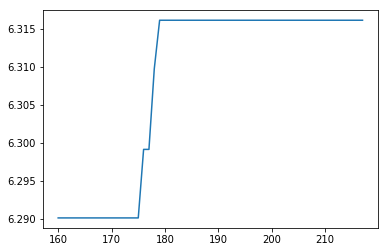

In [236]:
plt.plot(i_num,result)

In [264]:
interval_day = 1

Sqla =  " select t.* "
Sqla = Sqla + " from svm_cd_r2r t"
Sqla = Sqla + " where 1=1"
Sqla = Sqla + " and t.XML_OP_ID = 'GL-IEX'"
Sqla = Sqla + " and t.XML_ABBR_NO = '" + abbrno + "'"
Sqla = Sqla + " and t.XML_START_TIME >= NOW() - INTERVAL " + str(interval_day) + " DAY "

Sqla

df_now = pd.read_sql_query(Sqla, mydb)

df_now.to_csv('CD_DF_NOW.csv')
df_now = pd.read_csv('CD_DF_NOW.csv')

In [265]:
df_now

Unnamed: 0      SEQ XML_TRX_NAME  XML_PROJECT_ID XML_FAB  \
0            0  2633285  APC_SVM_RUN            9999     L5C   
1            1  2633286  APC_SVM_RUN            9999     L5C   
2            2  2633287  APC_SVM_RUN            9999     L5C   
3            3  2633571  APC_SVM_RUN            9999     L5C   
4            4  2633288  APC_SVM_RUN            9999     L5C   
5            5  2633572  APC_SVM_RUN            9999     L5C   
6            6  2633289  APC_SVM_RUN            9999     L5C   
7            7  2633573  APC_SVM_RUN            9999     L5C   
8            8  2633290  APC_SVM_RUN            9999     L5C   
9            9  2633574  APC_SVM_RUN            9999     L5C   
10          10  2633291  APC_SVM_RUN            9999     L5C   
11          11  2633575  APC_SVM_RUN            9999     L5C   
12          12  2633292  APC_SVM_RUN            9999     L5C   
13          13  2633576  APC_SVM_RUN            9999     L5C   
14          14  2633293  APC_SVM_RUN            9999     L5C   
15          15  2633577  APC_SVM_RUN            9999     L5C   
16          16  2633294  APC_SVM_RUN            9999     L5C   
17          17  2633578  APC_SVM_RUN            9999     L5C   
18          18  2633295  APC_SVM_RUN            9999     L5C   
19          19  2633579  APC_SVM_RUN            9999     L5C   
20          20  2633296  APC_SVM_RUN            9999     L5C   
21          21  2633580  APC_SVM_RUN            9999     L5C   
22          22  2633297  APC_SVM_RUN            9999     L5C   
23          23  2633581  APC_SVM_RUN            9999     L5C   
24          24  2633298  APC_SVM_RUN            9999     L5C   
25          25  2633582  APC_SVM_RUN            9999     L5C   
26          26  2633299  APC_SVM_RUN            9999     L5C   
27          27  2633583  APC_SVM_RUN            9999     L5C   
28          28  2633300  APC_SVM_RUN            9999     L5C   
29          29  2633584  APC_SVM_RUN            9999     L5C   
..         ...      ...          ...             ...     ...   
69          69  2635129  APC_SVM_RUN            9999     L5C   
70          70  2635410  APC_SVM_RUN            9999     L5C   
71          71  2635130  APC_SVM_RUN            9999     L5C   
72          72  2635411  APC_SVM_RUN            9999     L5C   
73          73  2635131  APC_SVM_RUN            9999     L5C   
74          74  2635412  APC_SVM_RUN            9999     L5C   
75          75  2635132  APC_SVM_RUN            9999     L5C   
76          76  2635413  APC_SVM_RUN            9999     L5C   
77          77  2635133  APC_SVM_RUN            9999     L5C   
78          78  2635414  APC_SVM_RUN            9999     L5C   
79          79  2635134  APC_SVM_RUN            9999     L5C   
80          80  2635415  APC_SVM_RUN            9999     L5C   
81          81  2635135  APC_SVM_RUN            9999     L5C   
82          82  2635416  APC_SVM_RUN            9999     L5C   
83          83  2635136  APC_SVM_RUN            9999     L5C   
84          84  2635417  APC_SVM_RUN            9999     L5C   
85          85  2635137  APC_SVM_RUN            9999     L5C   
86          86  2635418  APC_SVM_RUN            9999     L5C   
87          87  2635138  APC_SVM_RUN            9999     L5C   
88          88  2635419  APC_SVM_RUN            9999     L5C   
89          89  2635139  APC_SVM_RUN            9999     L5C   
90          90  2635420  APC_SVM_RUN            9999     L5C   
91          91  2635140  APC_SVM_RUN            9999     L5C   
92          92  2635421  APC_SVM_RUN            9999     L5C   
93          93  2635141  APC_SVM_RUN            9999     L5C   
94          94  2635422  APC_SVM_RUN            9999     L5C   
95          95  2635142  APC_SVM_RUN            9999     L5C   
96          96  2635423  APC_SVM_RUN            9999     L5C   
97          97  2635143  APC_SVM_RUN            9999     L5C   
98          98  2635424  APC_SVM_RUN            9999     L5C   

         XML_START_TIME XML_END_TIM

In [258]:
df_now = df_now.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )

df_now = df_now.drop_duplicates('XML_SHEET_ID')

df_now=df_now[['XML_SHEET_ID','XML_MODEL_NO' ,
       'XML_TOOL_ID','XML_ABBR_NO',
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG']]


In [259]:
df_now = df_now.drop(['XML_SHEET_ID','XML_MODEL_NO','XML_TOOL_ID','XML_ABBR_NO','SCANSPEED'],axis=1)

In [260]:
df_now['Y'] = cd_target

In [263]:
pred_now = model_sp.predict(df_now)

199.96857

In [269]:
result = []
i_num = []

for i in range(int(np.median(pred_now)-50),int(np.median(pred_now)+50),1):
    trainy_x.SCANSPEED = i
    pred_new_vd = model_y.predict(trainy_x)
    result.append(np.median(pred_new_vd))
    i_num.append(i)

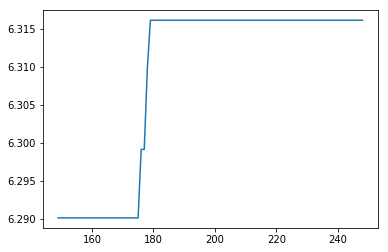

In [270]:
plt.plot(i_num,result)